# **PRÁCTICA GUIADA 01**

Grupo: 08

## **ALUMNOS:**

*   Mildred Micaela Marchan Quispe
*   Rody Sebastian Vilchez Marin
*   Rosa Maria Rodríguez Valencia



### Objetivos 
1. Realizar el EDA utilizando la herramienta  sweetviz del siguiente dataset. https://raw.githubusercontent.com/ProjectMOSAIC/NHANES/master/data-raw/NHANES.csv
2. Escoger por lo menos una división de datos por alumno para examinar las particiones de datos.
3. Investigue como exportar el informe EDA en formato HTML.
4. Investigue alguna otra herramienta similar a sweetviz para hacer el EDA. Realice el EDA con la 
herramienta investigada. Y haga un análisis comparativo de ambas herramientas. 


### Overview del dataset

Estamos trabajando con una muestra de un conjunto de datos de salud pública de los Estados Unidos, los datos fueron recopilados mediante encuestas, entrevistas y exámenes médicos. El conjunto de datos contiene información demográfica, de salud y nutricional de los participantes, así como datos sobre sus hábitos de vida y condiciones médicas.

Los datos corresponden a una sampleo de la fuente primaria [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm)

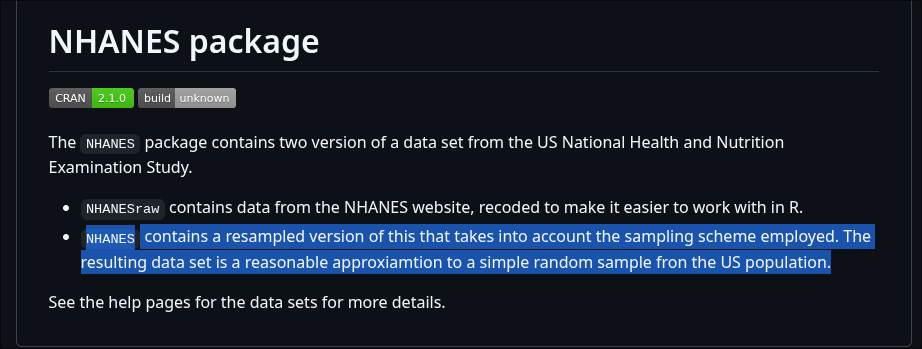

Fuente: [Repositorio de Github del proyecto MOSAIC](https://github.com/ProjectMOSAIC/NHANES)


### Librerias

In [ ]:
!pip install numpy==1.26.4 -q # resetear entorno en colab

In [ ]:
!pip install sweetviz -q

In [ ]:
!pip intall ydata-profiling ipywidgets -q


In [ ]:
import warnings
warnings.simplefilter(action="ignore")

import pandas as pd # cargar y manipular datos
import sweetviz as sv # herramienta de análisis exploratória
import seaborn as sns # gráficos
import matplotlib.pyplot as plt # gráficos
import numpy as np # procesamiento matemático
from scipy.stats import norm # normal

### Ingesta de datos

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ProjectMOSAIC/NHANES/master/data-raw/NHANES.csv",index_col=0)
df.shape

In [ ]:
print(df.isnull().sum().sum(), "valores nulos en el dataset")
print(df.duplicated().sum(), "valores duplicados en el dataset")

In [ ]:
df.sample(5)

## 1. Sweetviz

### 1.1 EDA crudo


In [ ]:
report = sv.analyze(df)
report.show_notebook() # EDA en notebook (Obj. 1)


## 1.2 Divisiones de datos 

### 1.2.1 EDA segmentado por nivel de ingresos 

Se realizo una dicotomizacion arbitriaria del nivel de ingresos en dos grupos, bajos ingresos y altos ingresos, con la finalidad de observar las diferencias entre ambos grupos en las variables del dataset. 

In [ ]:
"""
En esta ocasion fue conveniente complementar con este codigo
para copiar y pegar las categorias, evitando/corrigiendo errores de tipeo
y de ordenamiento al seleccionar por indice. 
"""

f_income = df['HHIncome'].unique() 
f_income 

In [ ]:
hight_income = df[df["HHIncome"].isin(["more 99999", "75000-99999", "65000-74999", "55000-64999","45000-54999"])]
low_income = df[df["HHIncome"].isin([ "35000-44999", "25000-34999","20000-24999","10000-14999", "5000-9999", "0-4999"])]

income_report = sv.compare(
    [low_income, "Bajos ingresos(5)"], 
    [hight_income, "Altos ingresos(6)"],
    pairwise_analysis="off" # se sopecha MAR 
    )


In [ ]:
income_report.show_notebook()

## 1.2.2 EDA segmentado por nivel de educación

Se realizo una dicotomizacion arbitriaria del nivel de educación en dos grupos, bajos niveles de educación y altos niveles de educación, donde bajo nivel de educación se considera inferior a secundaria completa y alto nivel de educación se considera desde estudios universitarios incompletos

In [ ]:
low_vals  = ["8thGrade", "9_11thGrade"]
high_vals = ["SomeCollege", "CollegeGrad"]

low_edu  = df[df["Education"].isin(low_vals)].copy()
high_edu = df[df["Education"].isin(high_vals)].copy()

edu_report = sv.compare(
    [low_edu, "Baja educacion(2)"], 
    [high_edu, "Alta educacion(2)"],
    pairwise_analysis="off"
    )
edu_report.show_notebook()

## 1.2.3 Problemas de sueño

In [ ]:

# División por problemas de sueño
sleep_trouble = df[df['SleepTrouble'] == 'Yes']
no_sleep_trouble = df[df['SleepTrouble'] == 'No']

# Comparar ambos grupos con Sweetviz
sleep_report = sv.compare([sleep_trouble, "Con Problemas de Sueño"], [no_sleep_trouble, "Sin Problemas de Sueño"])
sleep_report.show_notebook()

In [ ]:
income_report.to_file("NHANES_income_comparison.html") # exportar informe a HTML (Obj. 2)
edu_report.to_file("NHANES_education_comparison.html") # exportar informe a HTML (Obj. 2)
sleep_report.to_file('NHANES_sleeptrouble_comparison.html') # exportar informe a HTML (Obj. 2)

In [ ]:
from ydata_profiling import ProfileReport

raw_profile = ProfileReport(df, title="NHANES Profiling Report", explorative=True)

COMPU_POTENTE = False  # No puedo ejecutar en 4060 i2600k 26GB como servidor SSH y laptop i5 10ma 16GB RAM en vscode

if COMPU_POTENTE:
    raw_profile.to_notebook_iframe()
else:
    raw_profile.to_file("NHANES_EDA_report.html") 


In [ ]:
high_income_profile = ProfileReport(hight_income)
low_income_profile = ProfileReport(low_income)
high_income_profile.compare(low_income_profile).to_file("out/ydata_income_profie.html")


In [ ]:

high_edu_profile = ProfileReport(high_edu, minimal=True)
low_edu_profile = ProfileReport(low_edu, minimal=True)
high_edu_profile.compare(low_edu_profile).to_file("out/ydata_education_profie.html")


In [ ]:

sleep_trouble_profile = ProfileReport(sleep_trouble)
no_sleep_trouble_profile = ProfileReport(no_sleep_trouble)
sleep_trouble_profile.compare(no_sleep_trouble_profile).to_file("out/ydata_sleeptrouble_profie.html")


| Tema                           | **Sweetviz**                                                     | **YData-Profiling (pandas-profiling)**                                    |
| ------------------------------ | ---------------------------------------------------------------- | ------------------------------------------------------------------------- |
| **Enfoque**                    | Visual y comparativo (target, dataset vs dataset, intra-grupo).  | Perfilado EDA amplio: stats, correlaciones, missing, duplicados, alertas. |
| **Instalación**                | `pip install sweetviz`                                           | `pip install ydata-profiling`                                             |
| **Uso básico**                 | `sv.analyze(df)`                                                 | `ProfileReport(df, explorative=True)`                                     |
| **Comparar datasets**          | `sv.compare([df1,"A"], [df2,"B"])`                               | `ProfileReport(df1).compare(ProfileReport(df2))`                          |
| **Comparar grupos (mismo df)** | `sv.compare_intra(df, cond, ["True","False"])`                   | No tiene “intra” directo; deberías filtrar y generar dos reports.         |
| **Render en notebook**         | `report.show_notebook()` (simple).                               | `report.to_notebook_iframe()` → requiere **ipywidgets**.                  |
| **Exportar**                   | `report.show_html("out.html")`                                   | `report.to_file("out.html")`                                              |
| **Rendimiento**                | Ligero en medianos; muy grande puede tardar.                     | Completo pero más pesado; usar `minimal=True` para grandes.               |
| **Alertas de calidad**         | Básicas/visuales.                                                | Muchas alertas (constantes, alta cardinalidad, skew, etc.).               |
| **Correlaciones**              | Algunas vistas; foco en comparación.                             | Varias (Pearson/Spearman/Kendall), matrices e interacciones.              |
| **Valores perdidos**           | Resumen y gráficos claros.                                       | Mapas, heatmaps, patrones de missing, estimaciones.                       |
| **Interactividad**             | HTML navegable; enfoque gráfico.                                 | HTML navegable; múltiples pestañas y secciones técnicas.                  |
| **Temas/estilo**               | No tiene `theme` en `show_notebook()` (pasar `theme=` da error). | Sin “temas” como tal; look estándar del reporte.                          |
| **Dependencias extra**         | Ninguna especial para notebook.                                  | **ipywidgets** para ver inline en notebook.                               |
| **Cuándo elegirlo**            | Comparar **A vs B** rápido, presentar a no-técnicos.             | Auditoría EDA **profunda** y checklist de calidad de datos.               |


### Consumo

| Herramienta         | Configuración   | Hilos usados | Tiempo total | Observaciones                                                                    |
| ------------------- | --------------- | ------------ | ------------ | -------------------------------------------------------------------------------- |
| **YData-Profiling** | `minimal=False` | 3/14         | **3:36 min** | Reporte muy detallado, incluye estadísticas avanzadas y correlaciones profundas. |
| **YData-Profiling** | `minimal=True`  | 3/14         | **2:04 min** | Reporte resumido (sin tests pesados), sigue siendo más lento que Sweetviz.       |
| **Sweetviz**        | N/A             | 3/14         | **0:24 min** | Mucho más veloz, visualizaciones intuitivas, pero análisis menos exhaustivo.     |


## Conclusiones

El informe de Sweetviz resulta más intuitivo e interactivo, y en la mayoría de los casos ofrece información suficiente para realizar un buen análisis exploratorio. Sin embargo, al compararlo con YData-Profiling, queda algo limitado en cuanto a la profundidad y el nivel de detalle.

Con YData-Profiling se obtiene un reporte mucho más completo, con aspectos clave antes de modelar, como alertas sobre la calidad de los datos, detección de correlaciones, duplicados, valores atípicos, entre otros. La desventaja es que sus reportes son más pesados, y en nuestro caso ni siquiera pudimos visualizarlo embebido porque mi PC se colgó durante la ejecución. Sweetviz, en cambio, genera reportes más ligeros y rápidos, que suelen ser suficientes cuando no se necesita un análisis técnico tan exhaustivo.

En definitiva, la elección depende del contexto: si se busca rapidez y visualización clara para una primera exploración, Sweetviz es la mejor opción; mientras que si se requiere un análisis más profundo y riguroso, conviene optar por YData-Profiling (siempre que el hardware lo permita).